# **Vehicle CO2 Emissions Estimation - Linear Regression**

## About Dataset

**Description:**

This dataset contains information on vehicle specifications, fuel consumption, and CO2 emissions, collected to analyze the environmental impact of vehicles and predict their CO2 emissions using regression models. The dataset is structured to support both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) approaches for machine learning projects.

**Key Features**
- <font color =orange>Brand</font>: The brand or manufacturer of the vehicle (e.g., Toyota, Ford, BMW).
- <font color =orange>Vehicle Type</font>: Classification of vehicles based on size and usage (e.g., SUV, Sedan).
- <font color =orange>Engine Size (L)</font>: Engine displacement volume in liters.
- <font color =orange>Cylinders</font>: Number of cylinders in the engine.
- <font color =orange>Transmission</font>: Type of transmission (e.g., Automatic, Manual).
- <font color =orange>Fuel Type</font>: Type of fuel used by the vehicle (e.g., Gasoline, Diesel, Hybrid).
- <font color =orange>Fuel Consumption (City, Hwy, and Combined)</font>: Fuel efficiency measured in liters per 100 kilometers (L/100 km).
- <font color =orange>CO2 Emissions (g/km)</font>: Carbon dioxide emissions per kilometer (target variable for prediction).

**Use Cases**
- Exploratory Data Analysis (EDA):
  
  Clean and analyze the dataset to understand trends in CO2 emissions based on engine size, fuel type, and vehicle class.

- Simple Linear Regression (SLR):

  Use Engine Size (L) to predict CO2 Emissions (g/km).

- Multiple Linear Regression (MLR):

  Incorporate additional features like Fuel Consumption and Cylinders to create more accurate prediction models.

**Objective**
This dataset is designed to:

 - Help understand the relationship between vehicle specifications and their environmental impact.
 - Enable the application of regression models for predicting CO2 emissions.
 - Explore the impact of fuel efficiency and engine size on carbon emissions.

**Why This Dataset?**

Environmental concerns are a critical issue, and analyzing CO2 emissions is essential to mitigate climate change. It offers a practical application for machine learning students and professionals to develop predictive models. Provides an opportunity to practice EDA, data cleaning, and regression modeling techniques.

**Dataset Highlights**
- Suitable for both beginners and advanced practitioners in data science.
- Provides a hands-on opportunity to work on real-world data.
- Perfect for showcasing machine learning skills in regression analysis.

**Provider:** Batuhan Şahan

Reference: https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data

## About this notebook

For this notebook, we refer the source code shared by Pavan Kumar S on Kaggle as a reference.
(https://www.kaggle.com/code/pavankumar4757/co2-emissions-prediction-r-0-99-rmse-5-48/notebook)

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
#%matplotlib inline

## Importing the dataset

In [2]:
filepath = "C:/Users/User/My Porject (Jupyter notebook)/Database/co2.csv"

data = pd.read_csv(filepath, header=0)

In [3]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
data.head(5)

The first 5 rows of the dataframe


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Detail for the dataset 

- **Make:** The manufacturer or brand of the vehicle (e.g., Toyota, Ford, BMW).
  
- **Model:** The specific model of the vehicle, indicating its design and version.
- **Vehicle Class:** Classification of vehicles based on size and intended usage (e.g., Compact, SUV, Sedan).
- **Engine Size(L):** The displacement volume of the engine, measured in liters (L). Larger engine sizes typically indicate more power but higher fuel consumption.
- **Cylinders:** The number of cylinders in the engine, which affects engine performance and efficiency.
- **Transmission:** The type of transmission system in the vehicle, which determines how the engine power is delivered to the wheels.
- **Fuel Type:** The type of fuel used by the vehicle. Different fuel types affect efficiency, cost, and emissions.
- **Fuel Consumption City (L/100 km):** The fuel consumption of the vehicle in city driving conditions, measured in liters per 100 kilometers (L/100 km).
- **Fuel Consumption Hwy (L/100 km):** The fuel consumption of the vehicle on highways, measured in liters per 100 kilometers (L/100 km).
- **Fuel Consumption Comb (L/100 km):** The combined fuel consumption of the vehicle (average of city and highway driving), measured in liters per 100 kilometers (L/100 km).
- **Fuel Consumption Comb (mpg):** The combined fuel consumption of the vehicle (average of city and highway driving), measured in miles per gallon (mpg).
- **CO2 Emissions (g/km):** <font color = red>Target variable</font>, CO2 emissions in grams per kilometer.

In [4]:
data.rename(columns={'Make': 'Brand'}, inplace=True)
print(data.head())

   Brand       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [5]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
data.describe(include=['object'])

,Brand,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Brand                             7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
data.isna().sum()

Brand                               0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## EDA

### Visualize individual feature patterns

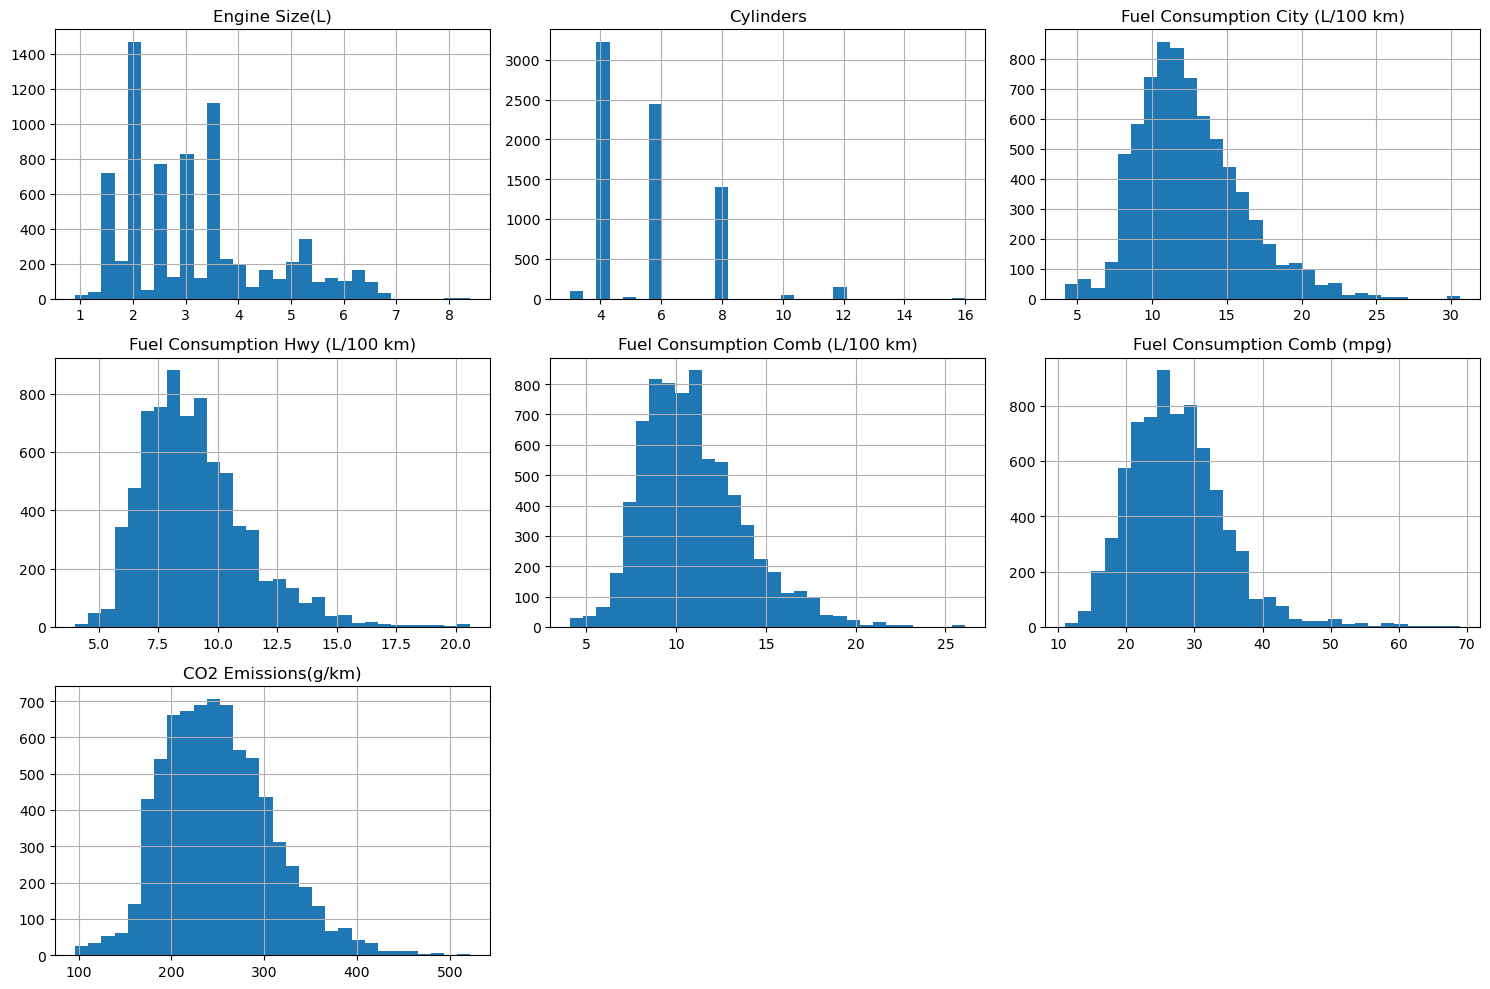

In [9]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Histogram for CO2 Emissions

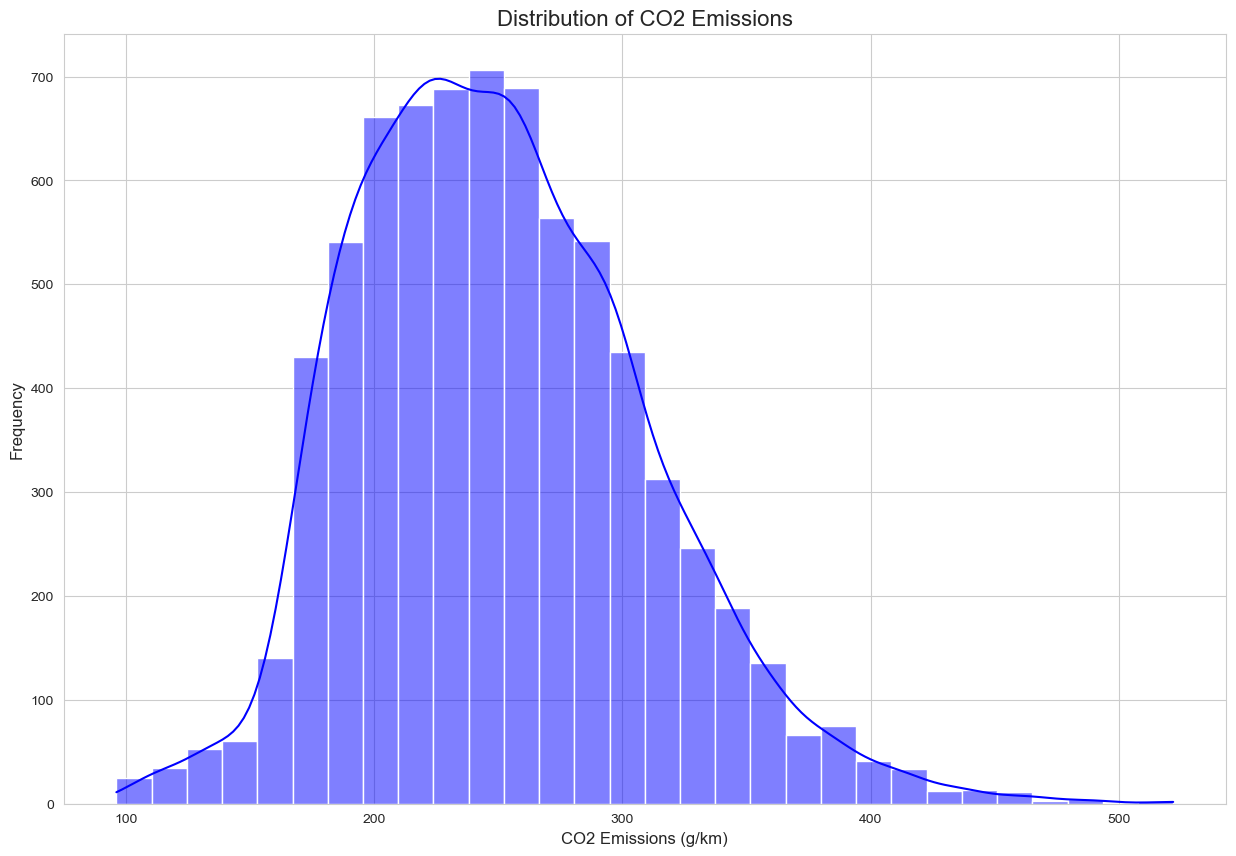

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))
sns.histplot(data['CO2 Emissions(g/km)'], kde=True, color='blue', bins=30)
plt.title('Distribution of CO2 Emissions', fontsize=16)
plt.xlabel('CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Continuous valued features
Generate scatter plots and regression plots for each of the parameters "Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)" and "Fuel Consumption Comb (mpg)" against "CO2 Emissions(g/km)". Also, print the value of correlation of each feature with "CO2 Emissions(g/km)".

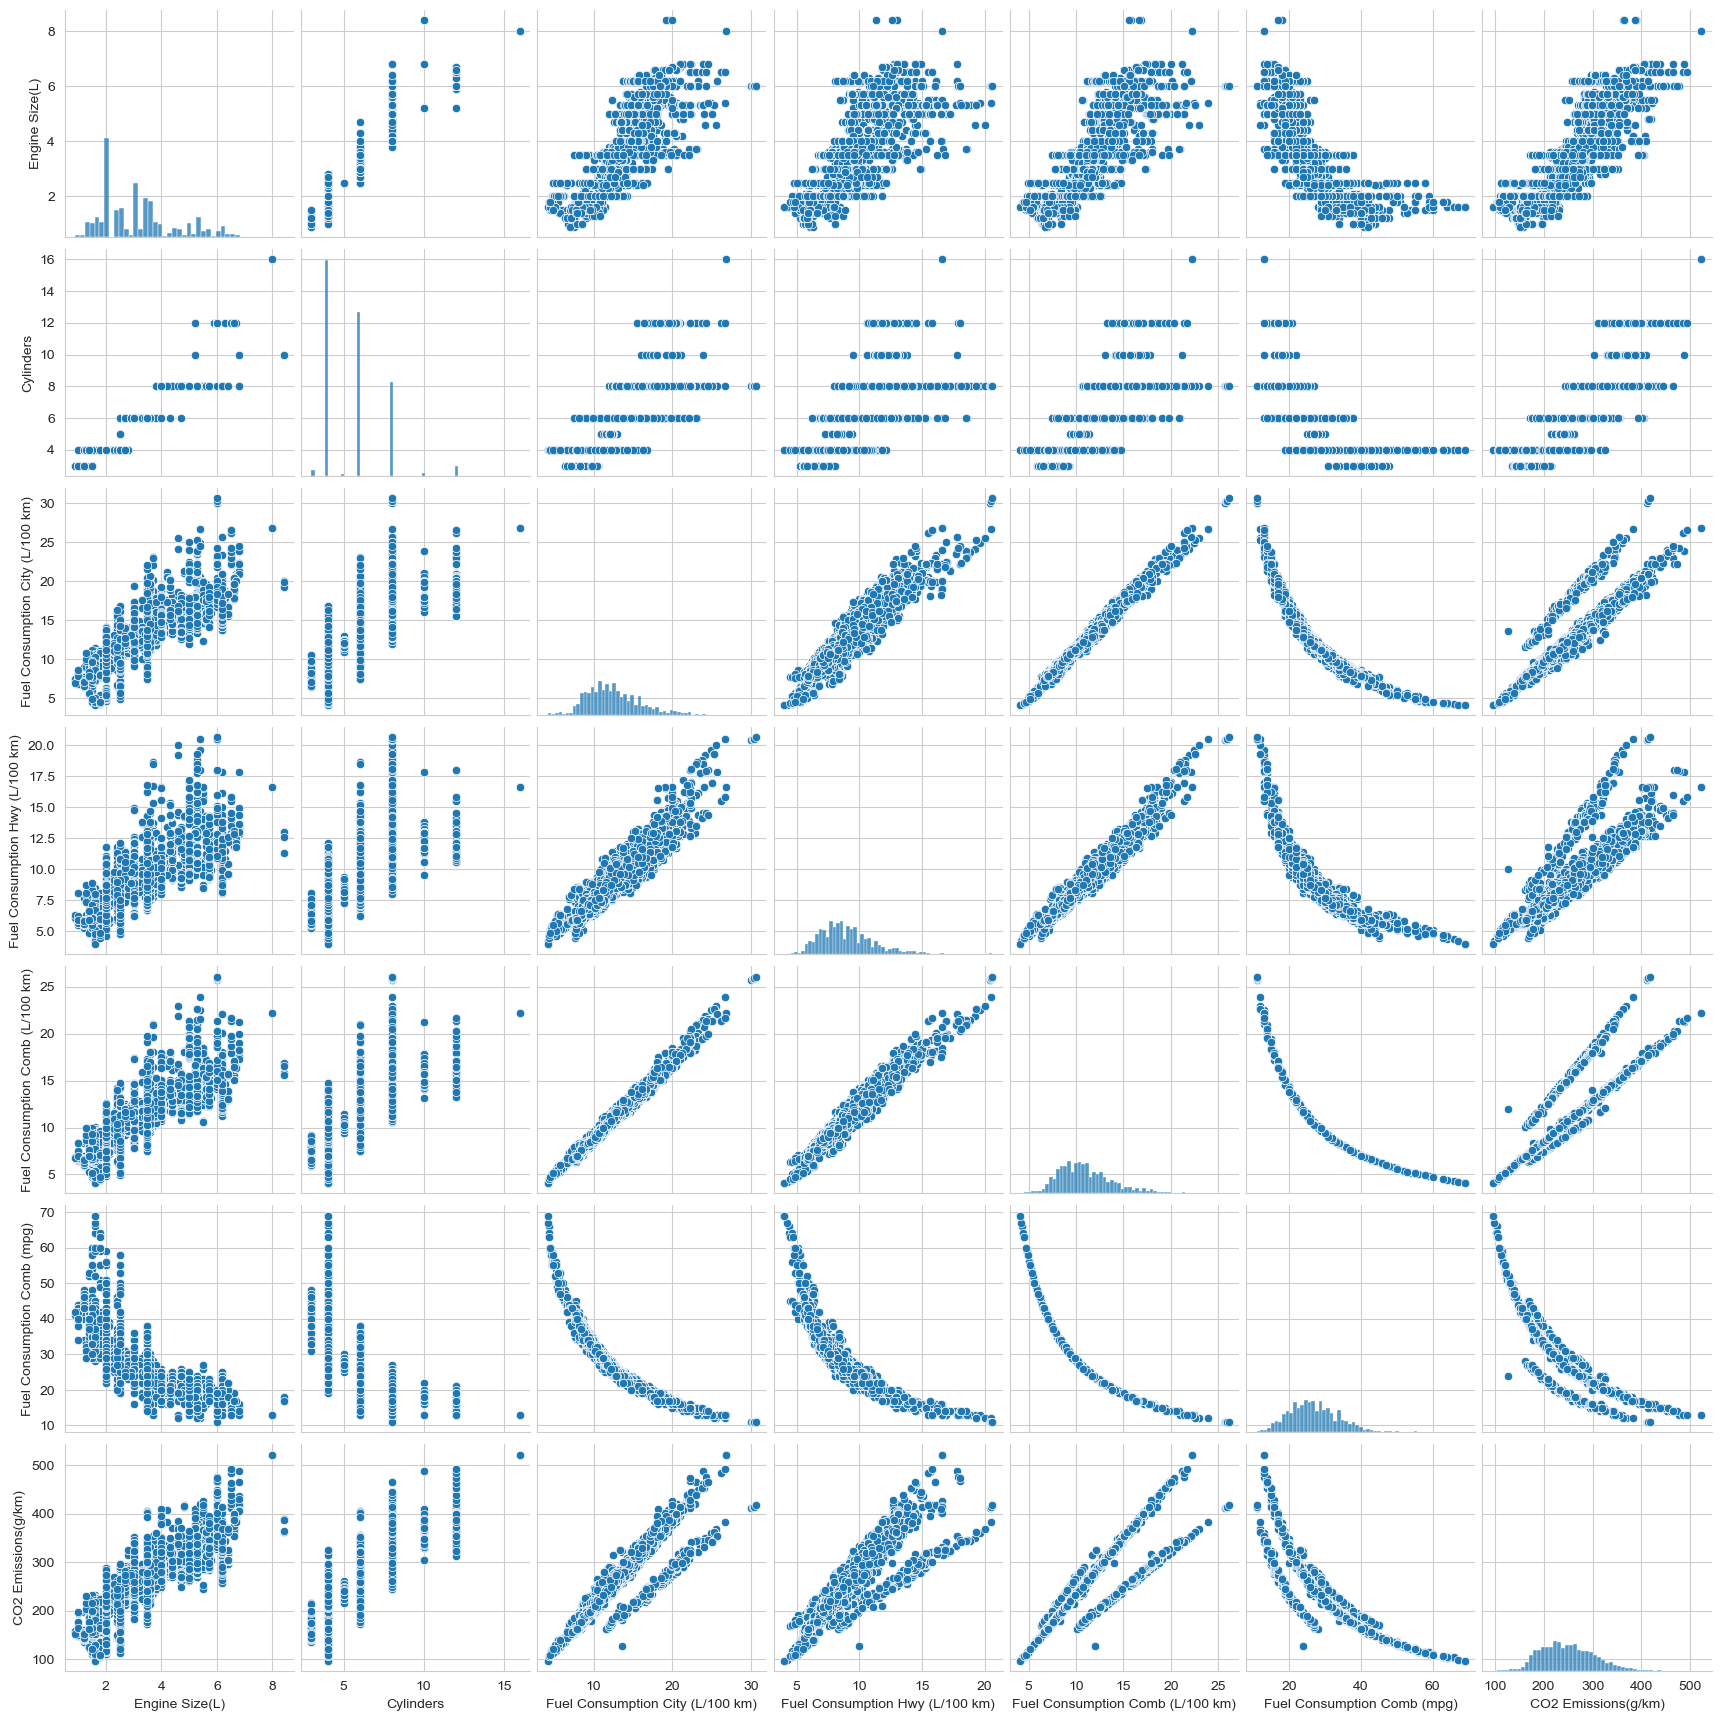

In [11]:
sns.pairplot(data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']])
plt.show()

<font color = red> **Note that the reason why the hue parameter is selected as "Fuel Type" is because "Fuel Type" has only five categories, which is the range we can handle compared to other features.**

<font color = orange> (1.1) Scatter plot of "Engine Size(L)" vs "CO2 Emissions(g/km)"

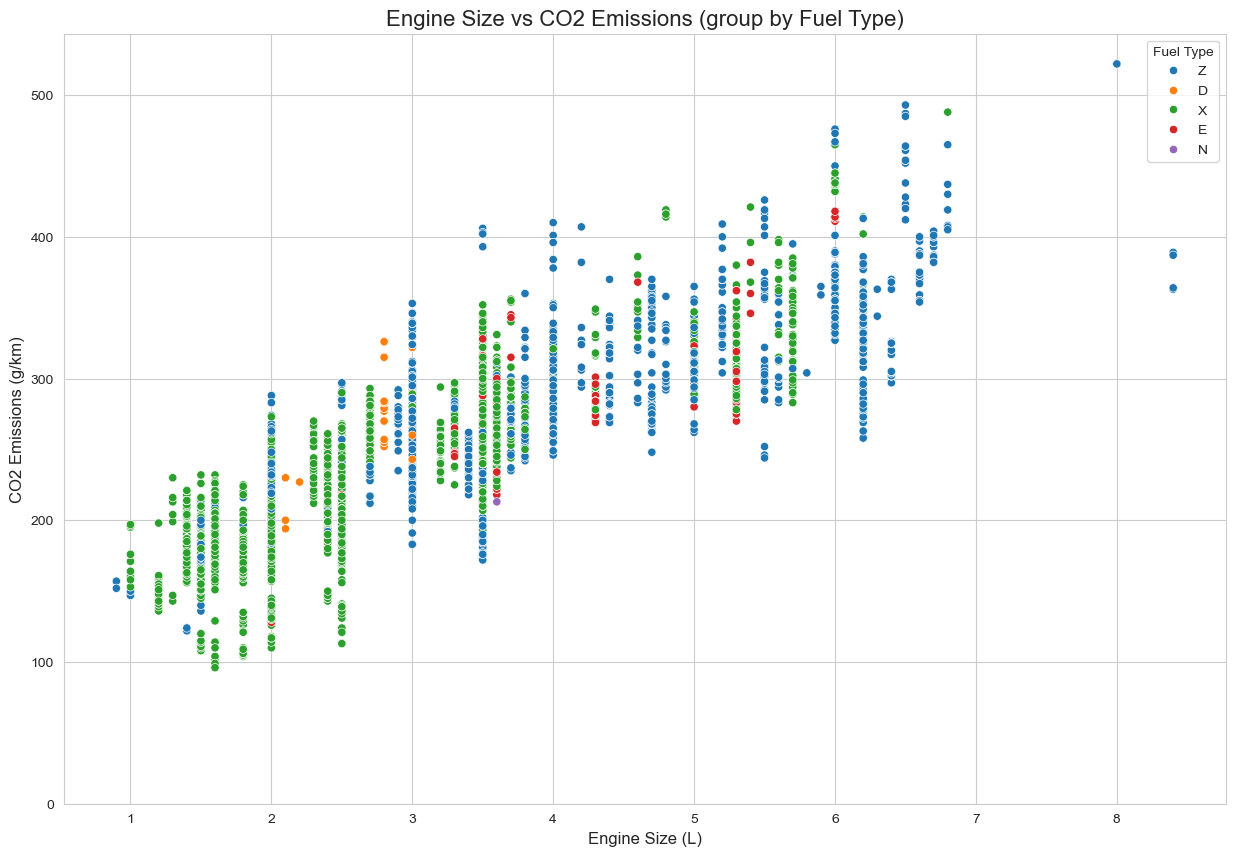

In [12]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='tab10')
plt.title('Engine Size vs CO2 Emissions (group by Fuel Type)', fontsize=16)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.ylim(0,)
plt.show()

<font color = orange> (1.2) Regression plot of "Engine Size(L)" vs "CO2 Emissions(g/km)"

Text(0, 0.5, 'CO2 Emissions (g/km)')

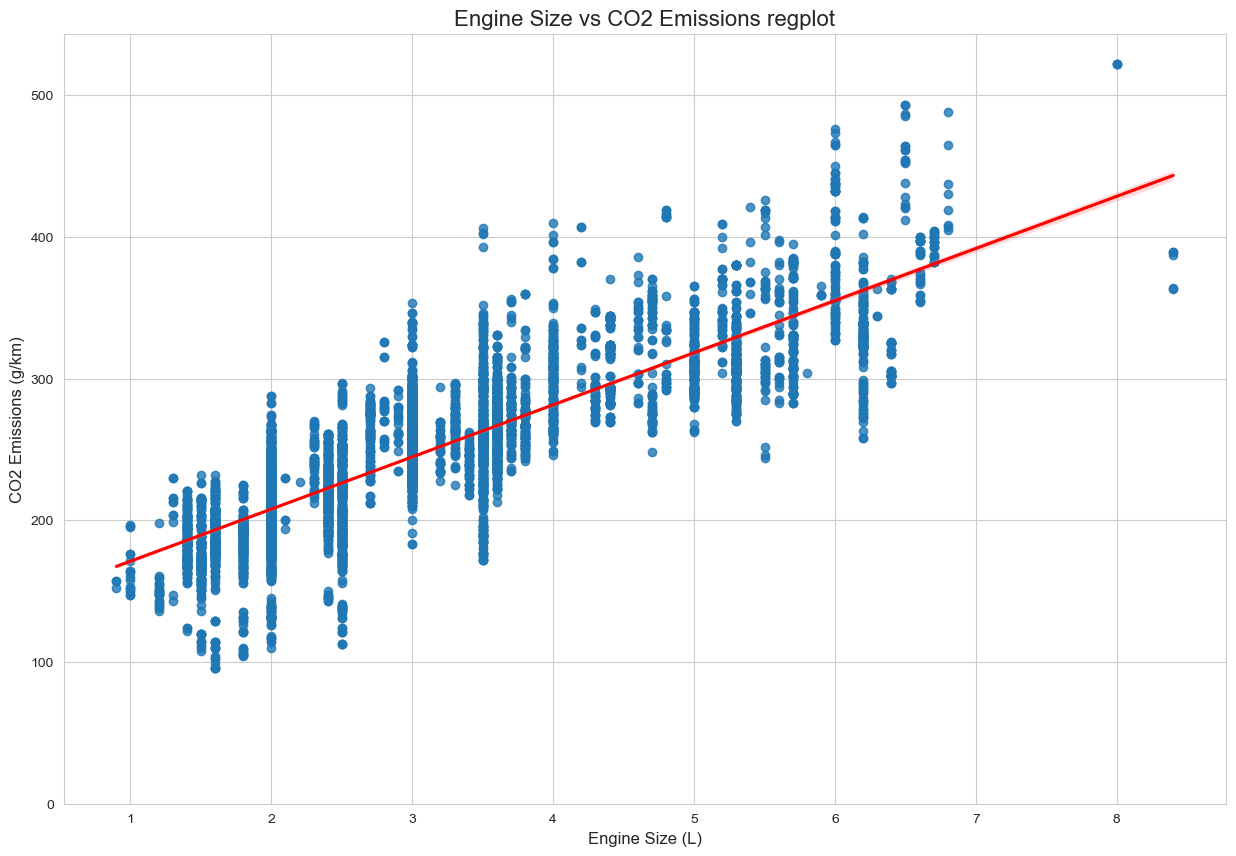

In [13]:
plt.figure(figsize=(15, 10))
sns.regplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=data, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Engine Size vs CO2 Emissions regplot', fontsize=16)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)

<font color = orange> (2.1) Scatter plot of "Cylinders" vs "CO2 Emissions(g/km)"

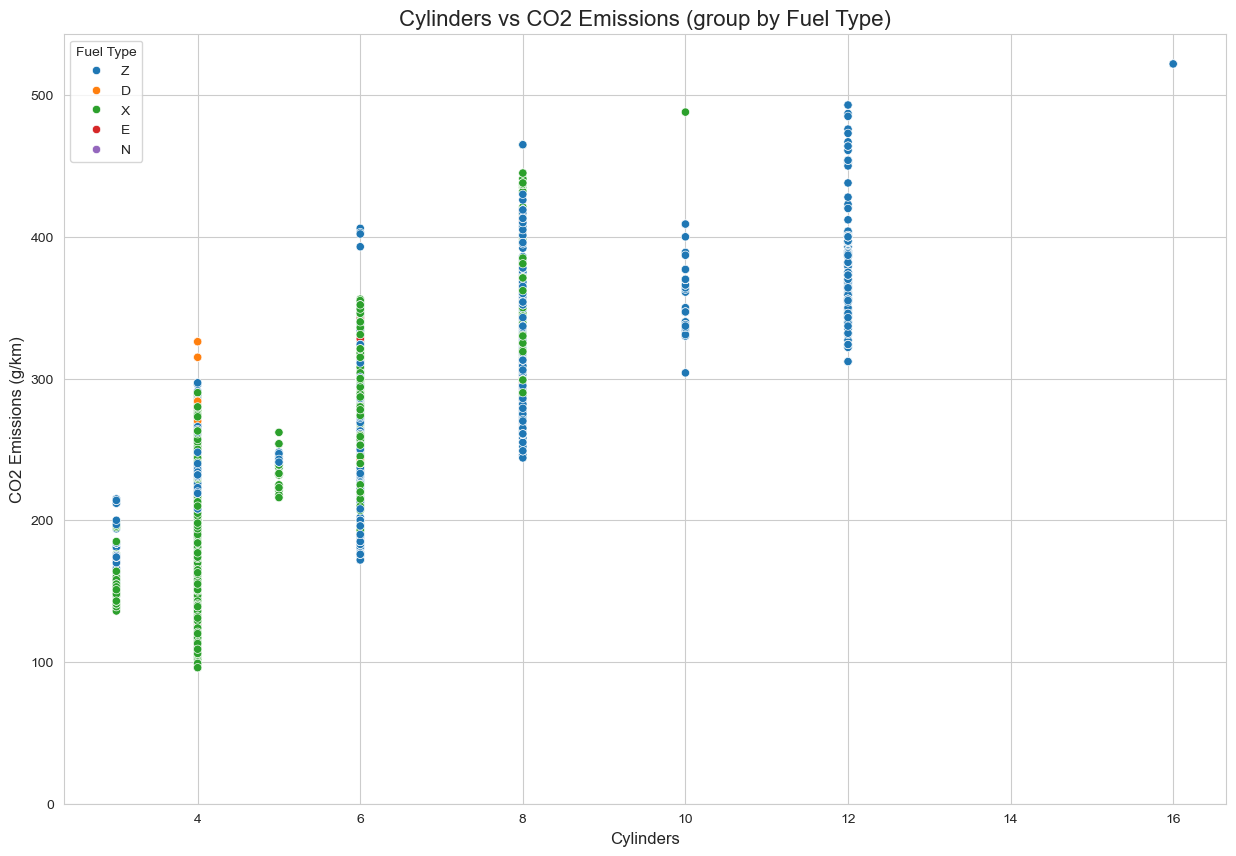

In [14]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='Cylinders', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='tab10')
plt.title('Cylinders vs CO2 Emissions (group by Fuel Type)', fontsize=16)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.ylim(0,)
plt.show()

<font color = orange> (2.2) Regression plot of "Cylinders" vs "CO2 Emissions(g/km)"

Text(0, 0.5, 'CO2 Emissions (g/km)')

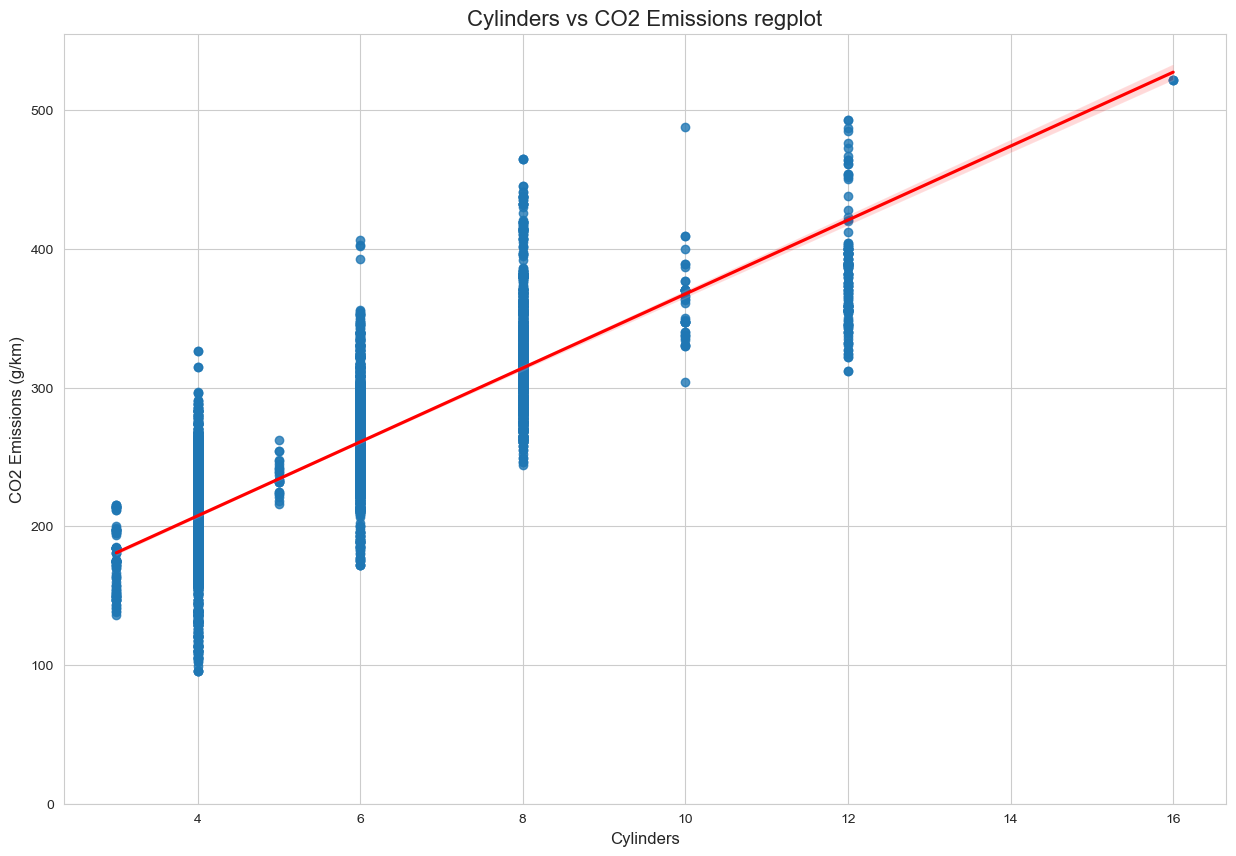

In [15]:
plt.figure(figsize=(15, 10))
sns.regplot(x="Cylinders", y="CO2 Emissions(g/km)", data=data, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Cylinders vs CO2 Emissions regplot', fontsize=16)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)

<font color = orange> (3.1) Scatter plot of "Fuel Consumption City (L/100 km)" vs "CO2 Emissions(g/km)"

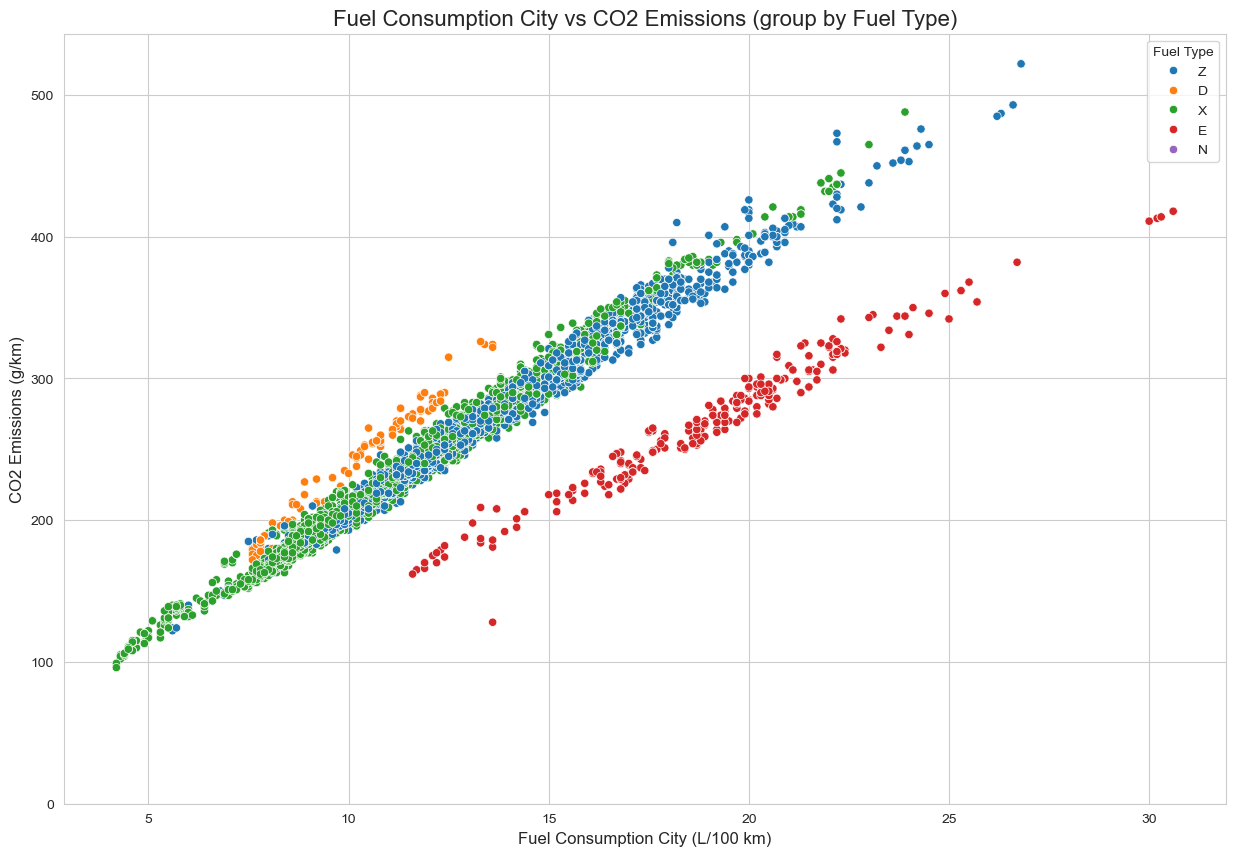

In [16]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='tab10')
plt.title('Fuel Consumption City vs CO2 Emissions (group by Fuel Type)', fontsize=16)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.ylim(0,)
plt.show()

<font color = orange> (3.2) Regression plot of "Fuel Consumption City (L/100 km)" vs "CO2 Emissions(g/km)"

Text(0, 0.5, 'CO2 Emissions(g/km)')

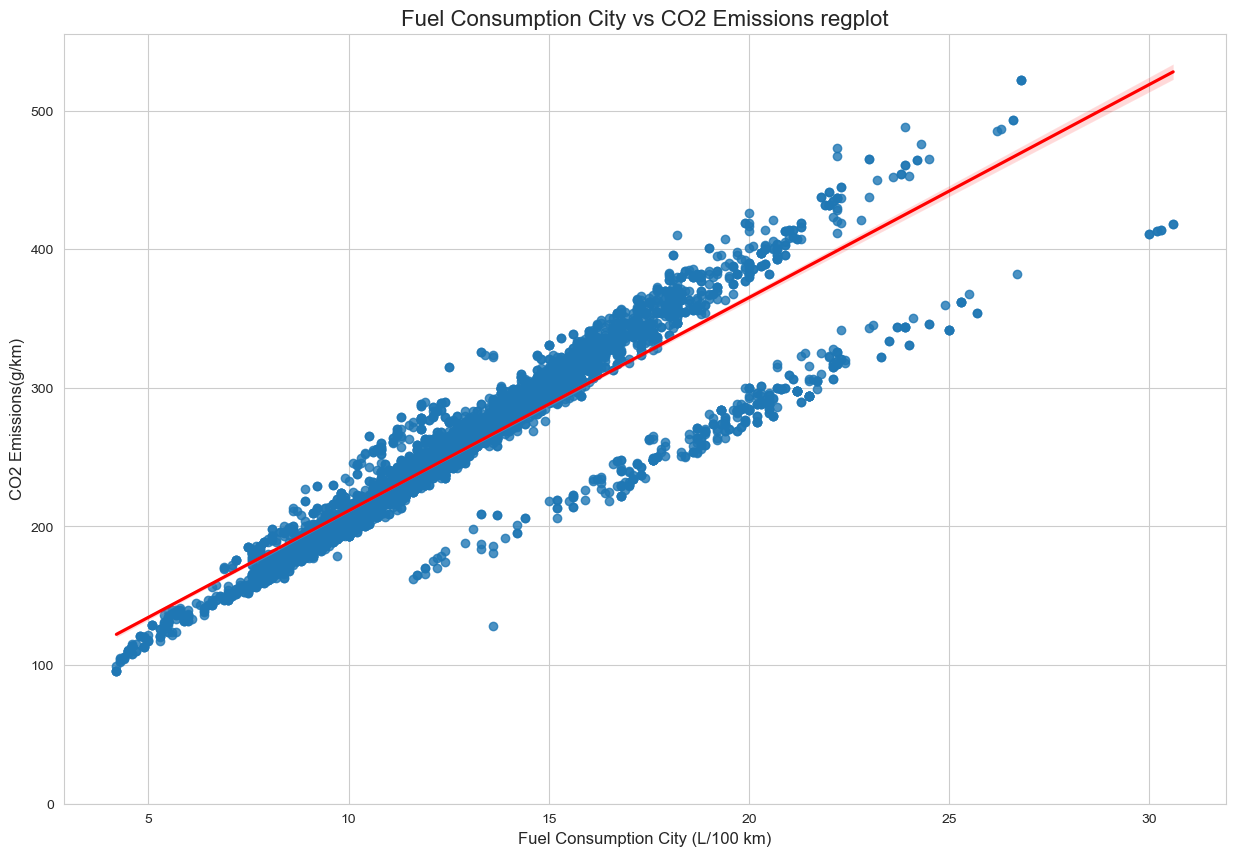

In [17]:
plt.figure(figsize=(15, 10))
sns.regplot(x="Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)", data=data, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Fuel Consumption City vs CO2 Emissions regplot', fontsize=16)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

<font color = orange> (4.1) Scatter plot of "Fuel Consumption Hwy (L/100 km)" vs "CO2 Emissions(g/km)"

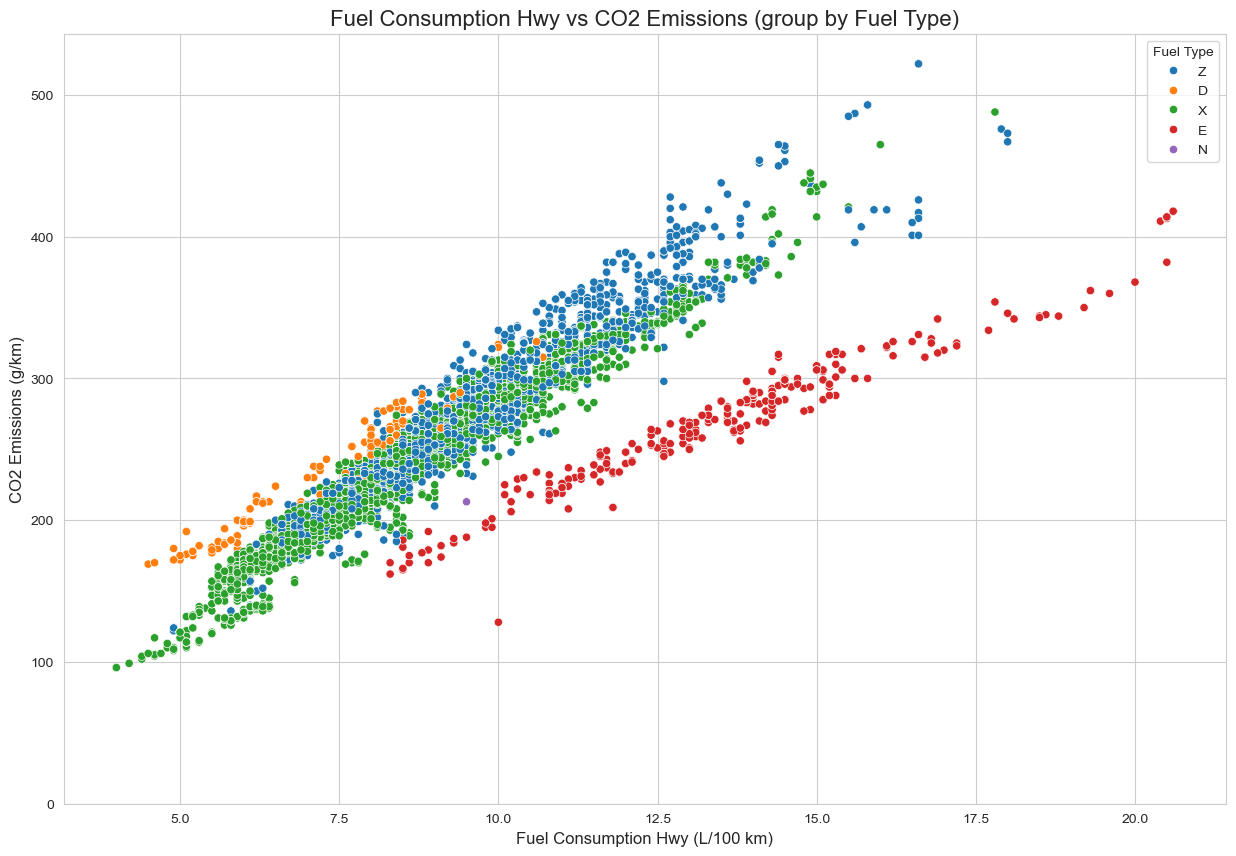

In [18]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='tab10')
plt.title('Fuel Consumption Hwy vs CO2 Emissions (group by Fuel Type)', fontsize=16)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.ylim(0,)
plt.show()

<font color = orange> (4.2) Regression plot of "Fuel Consumption Hwy (L/100 km)" vs "CO2 Emissions(g/km)"

Text(0, 0.5, 'CO2 Emissions (g/km)')

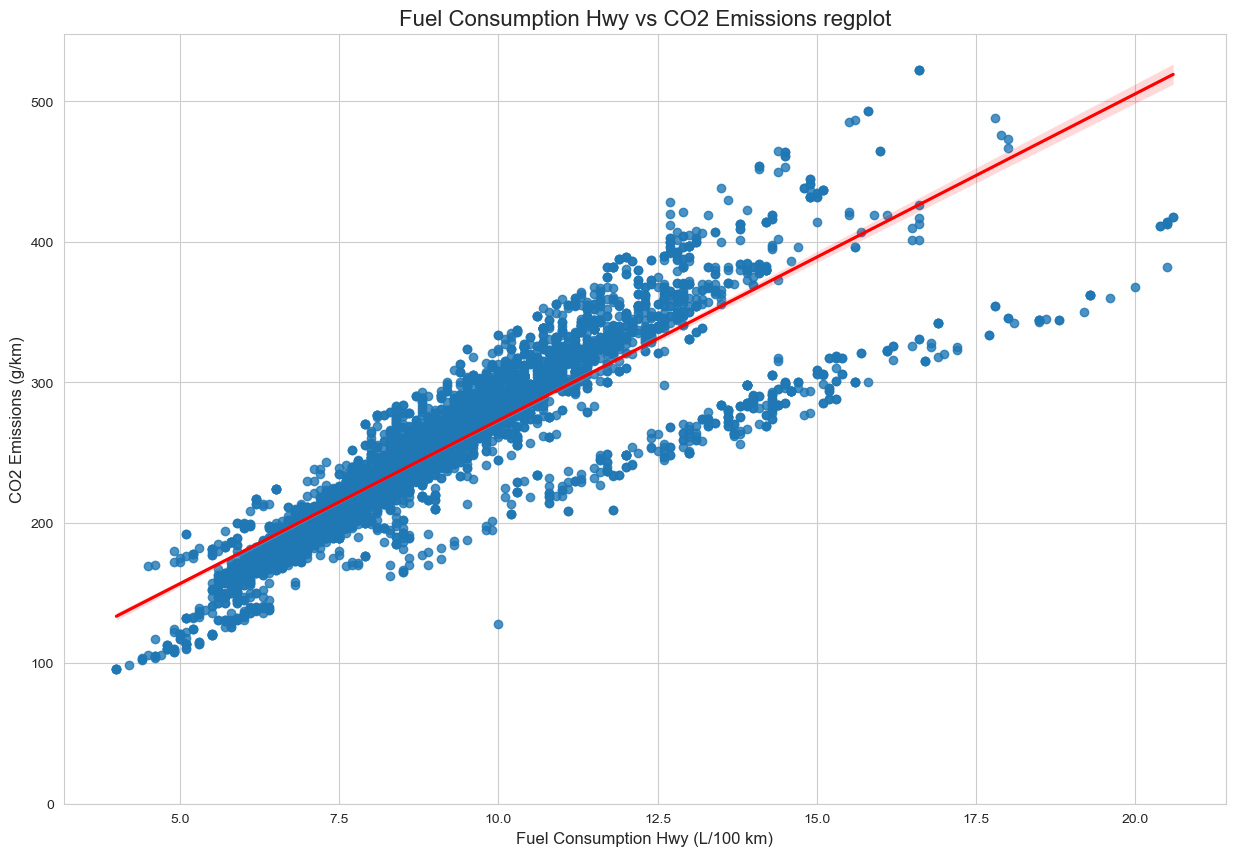

In [19]:
plt.figure(figsize=(15, 10))
sns.regplot(x="Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)", data=data, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Fuel Consumption Hwy vs CO2 Emissions regplot', fontsize=16)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)

<font color = orange> (5.1) Scatter plot of "Fuel Consumption Comb (L/100 km)" vs "CO2 Emissions(g/km)"

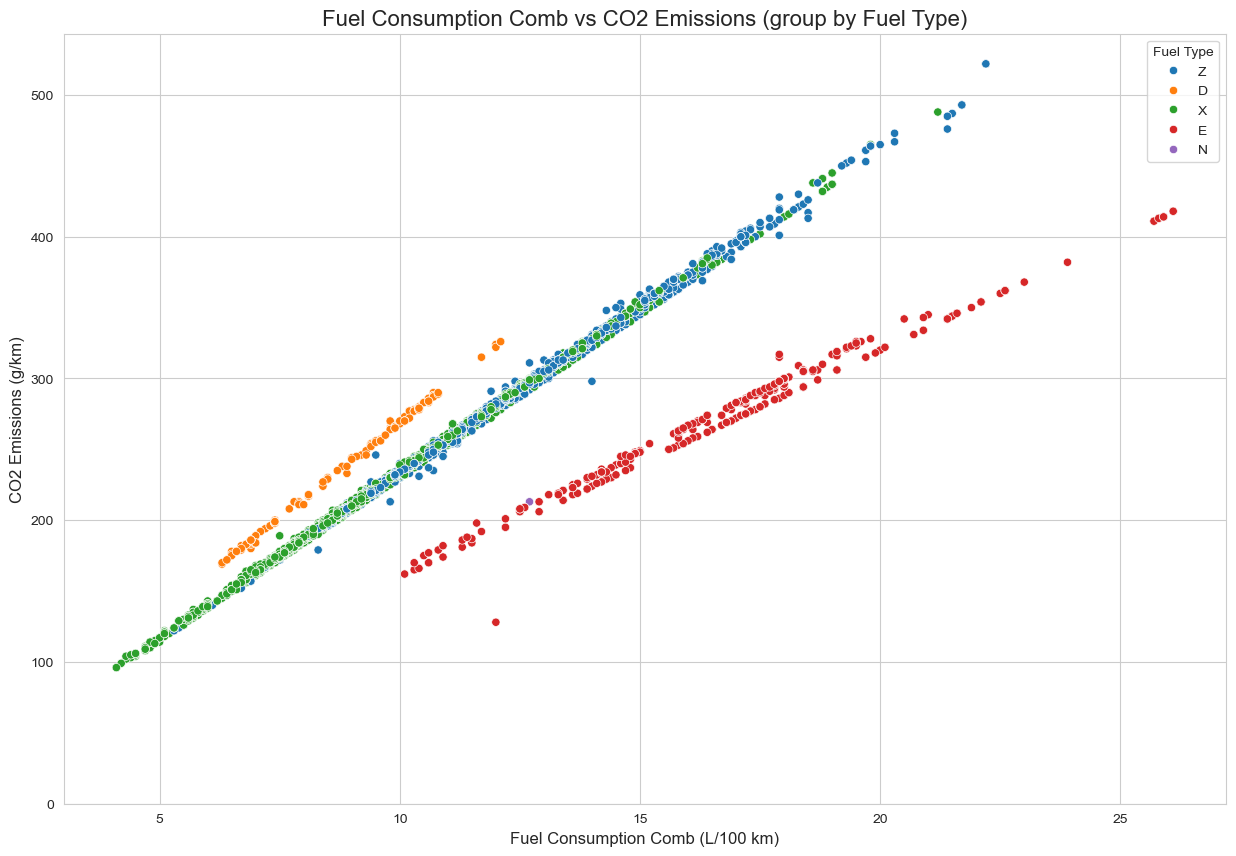

In [20]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='tab10')
plt.title('Fuel Consumption Comb vs CO2 Emissions (group by Fuel Type)', fontsize=16)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.ylim(0,)
plt.show()

<font color = orange> (5.2) Regression plot of "Fuel Consumption Comb (L/100 km)" vs "CO2 Emissions(g/km)"

Text(0, 0.5, 'CO2 Emissions (g/km)')

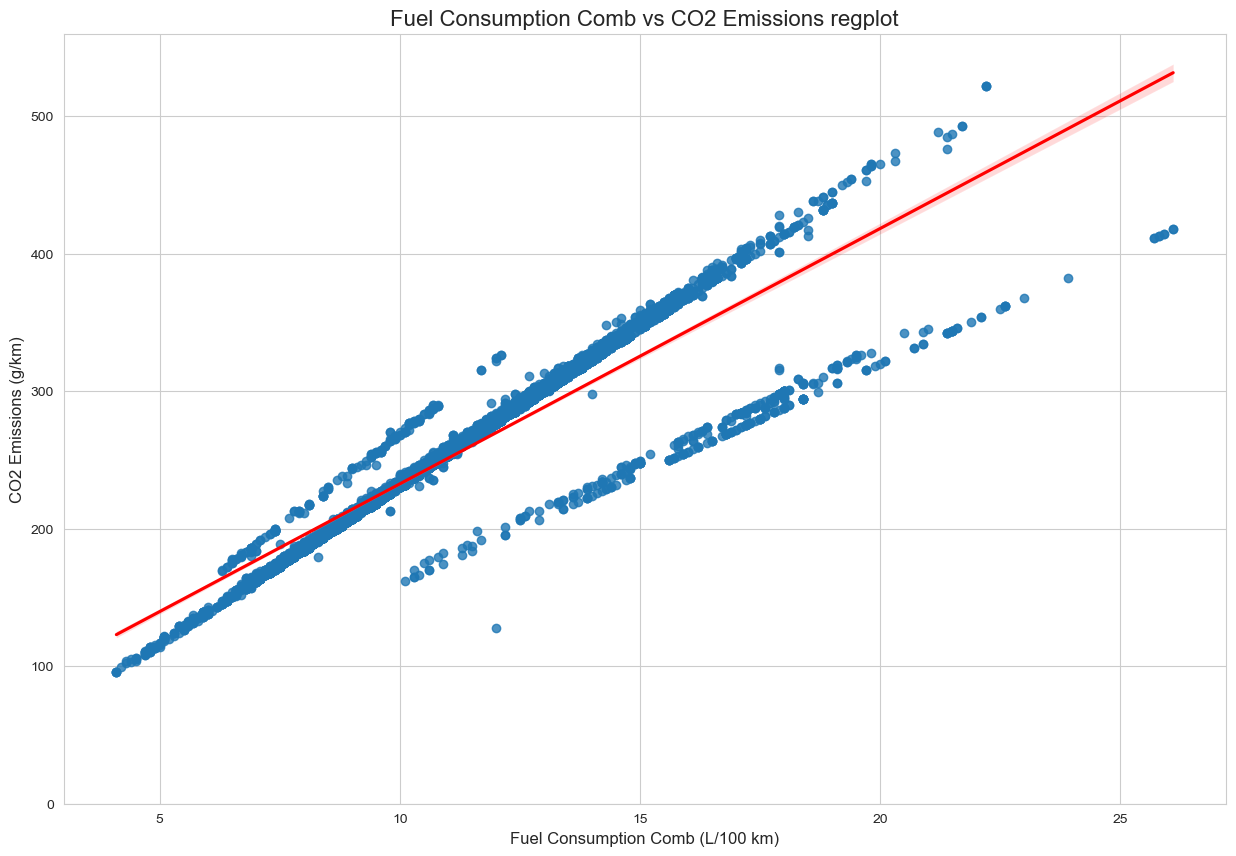

In [21]:
plt.figure(figsize=(15, 10))
sns.regplot(x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", data=data, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Fuel Consumption Comb vs CO2 Emissions regplot', fontsize=16)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)

<font color = orange> (6.1) Scatter plot of "Fuel Consumption Comb (mpg)" vs "CO2 Emissions(g/km)"

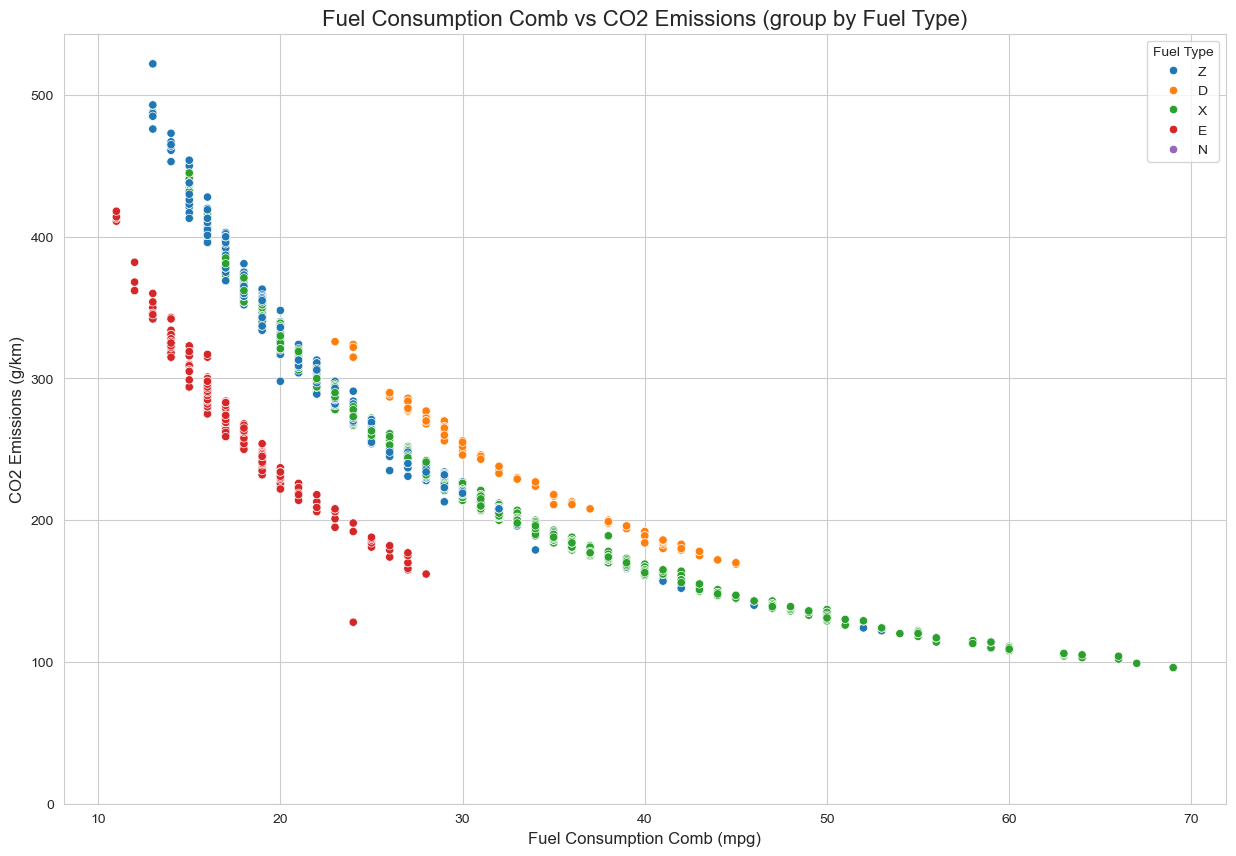

In [22]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', hue='Fuel Type', palette='tab10')
plt.title('Fuel Consumption Comb vs CO2 Emissions (group by Fuel Type)', fontsize=16)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.ylim(0,)
plt.show()

<font color = orange> (6.2) Regression plot of "Fuel Consumption Comb (mpg)" vs "CO2 Emissions(g/km)"

Text(0, 0.5, 'CO2 Emissions (g/km)')

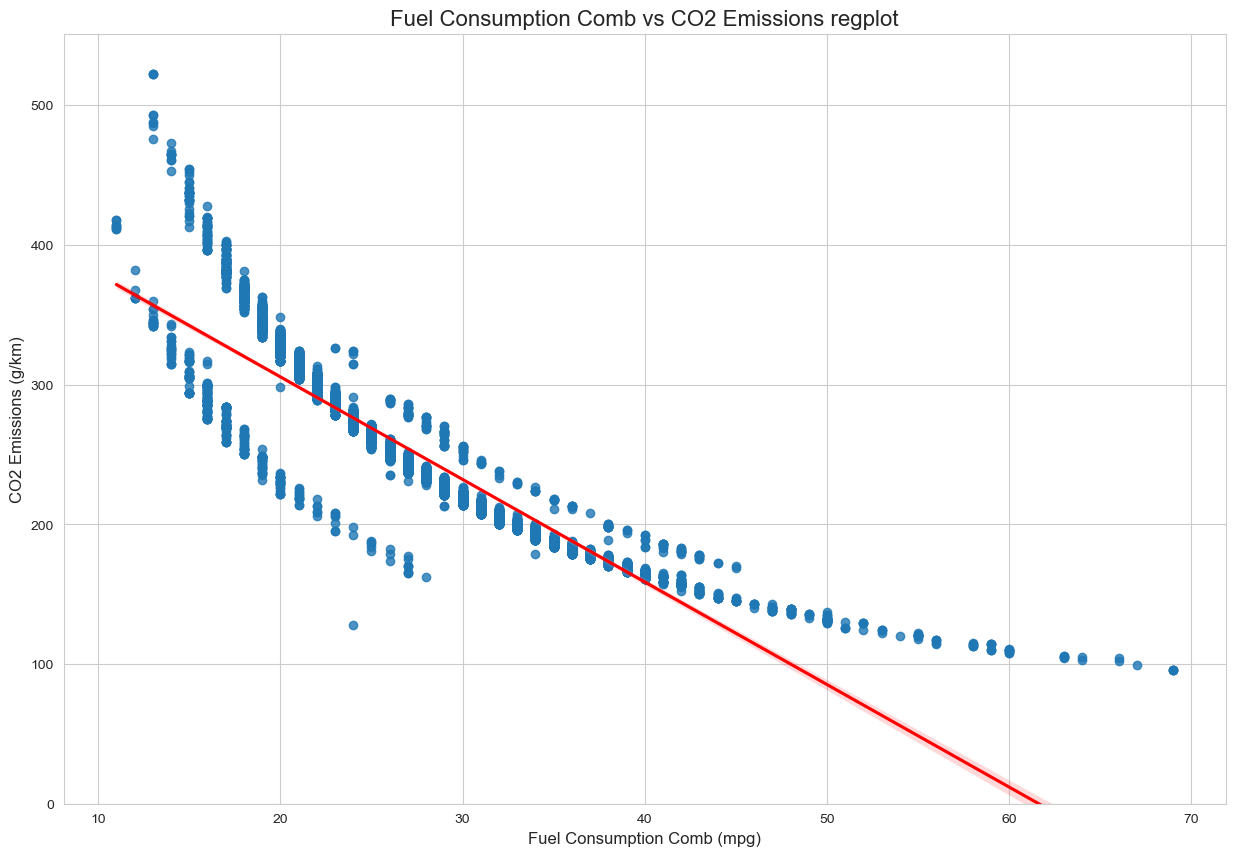

In [23]:
plt.figure(figsize=(15, 10))
sns.regplot(x="Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)", data=data, line_kws=dict(color="r"))
plt.ylim(0,)
plt.title('Fuel Consumption Comb vs CO2 Emissions regplot', fontsize=16)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)

In [24]:
# Correlation values of the four attributes with Energy Consumption
data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']].corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


#### Categorical features
Generate Count plots and Box plots for the different feature that hold categorical values. These features would be "Brand", "Vehicle Class", "Transmission" and "Fuel Type".

<font color = red>Here, we skip feature "Model" since it has 2053 unique types.

<font color = orange> **1. Brand**

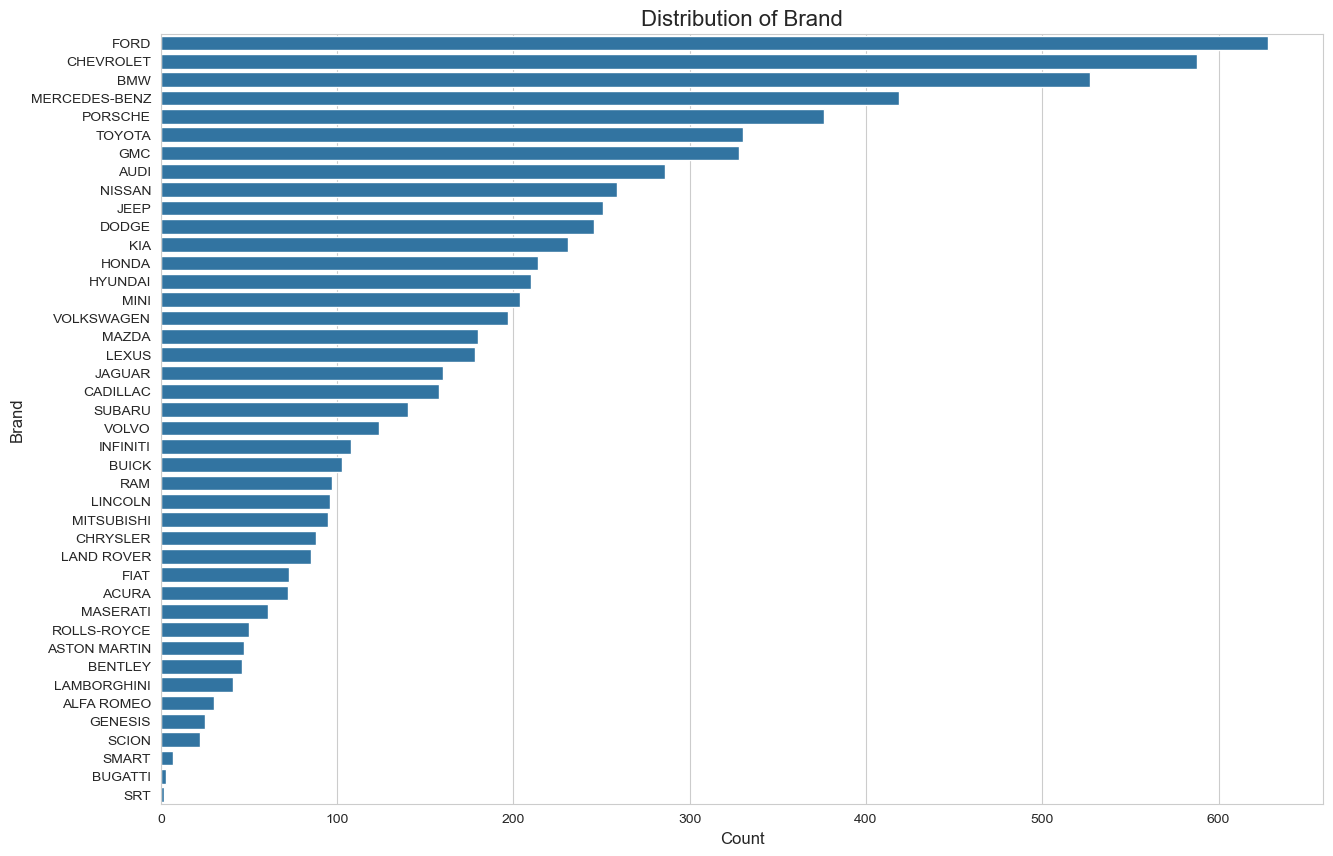

In [35]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Brand', data=data, order=data['Brand'].value_counts().index)
plt.title('Distribution of Brand', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.show()

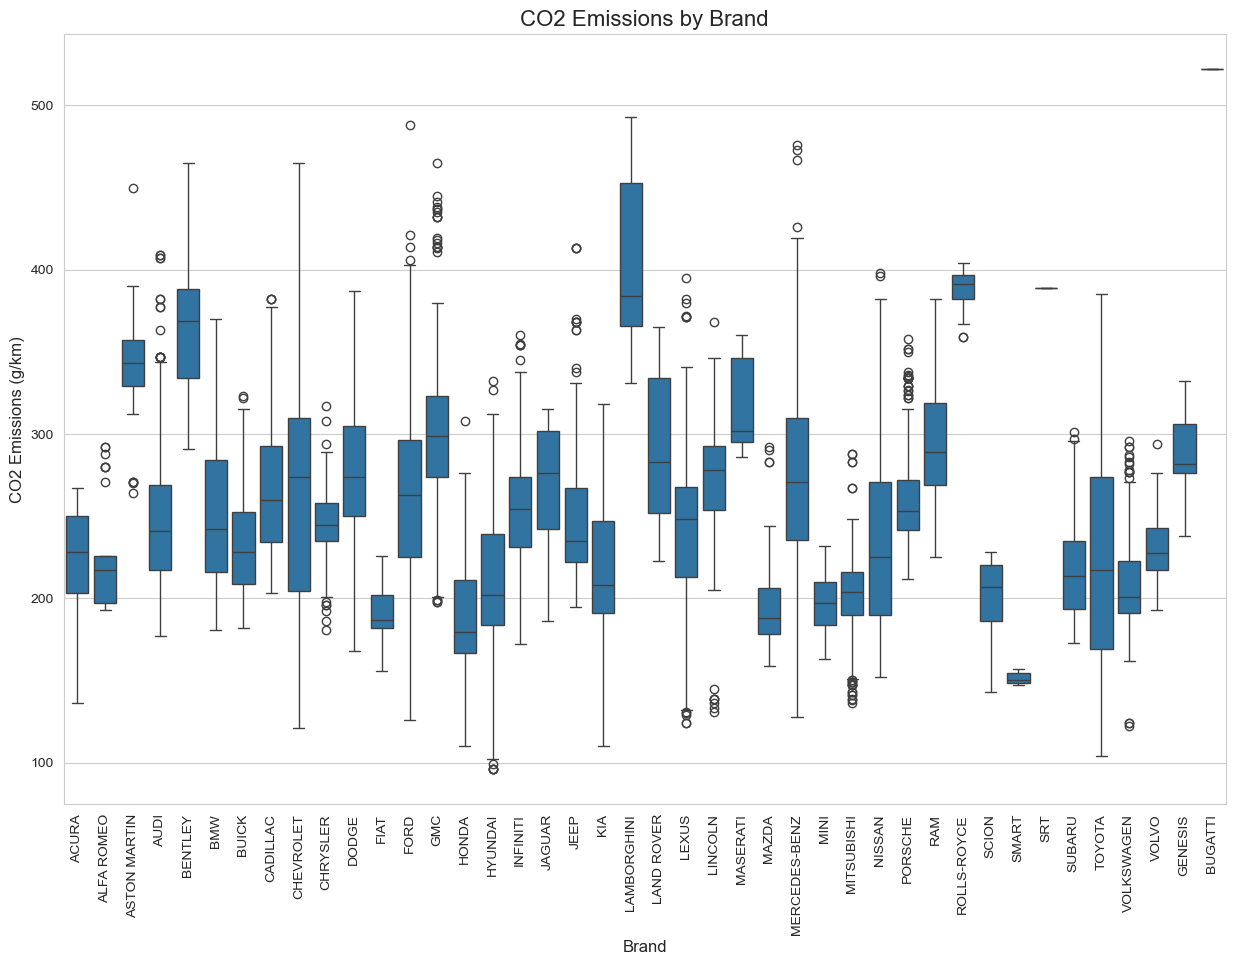

In [36]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Brand', y='CO2 Emissions(g/km)', data=data)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.show()

<font color = orange> **2. Vehicle Class**

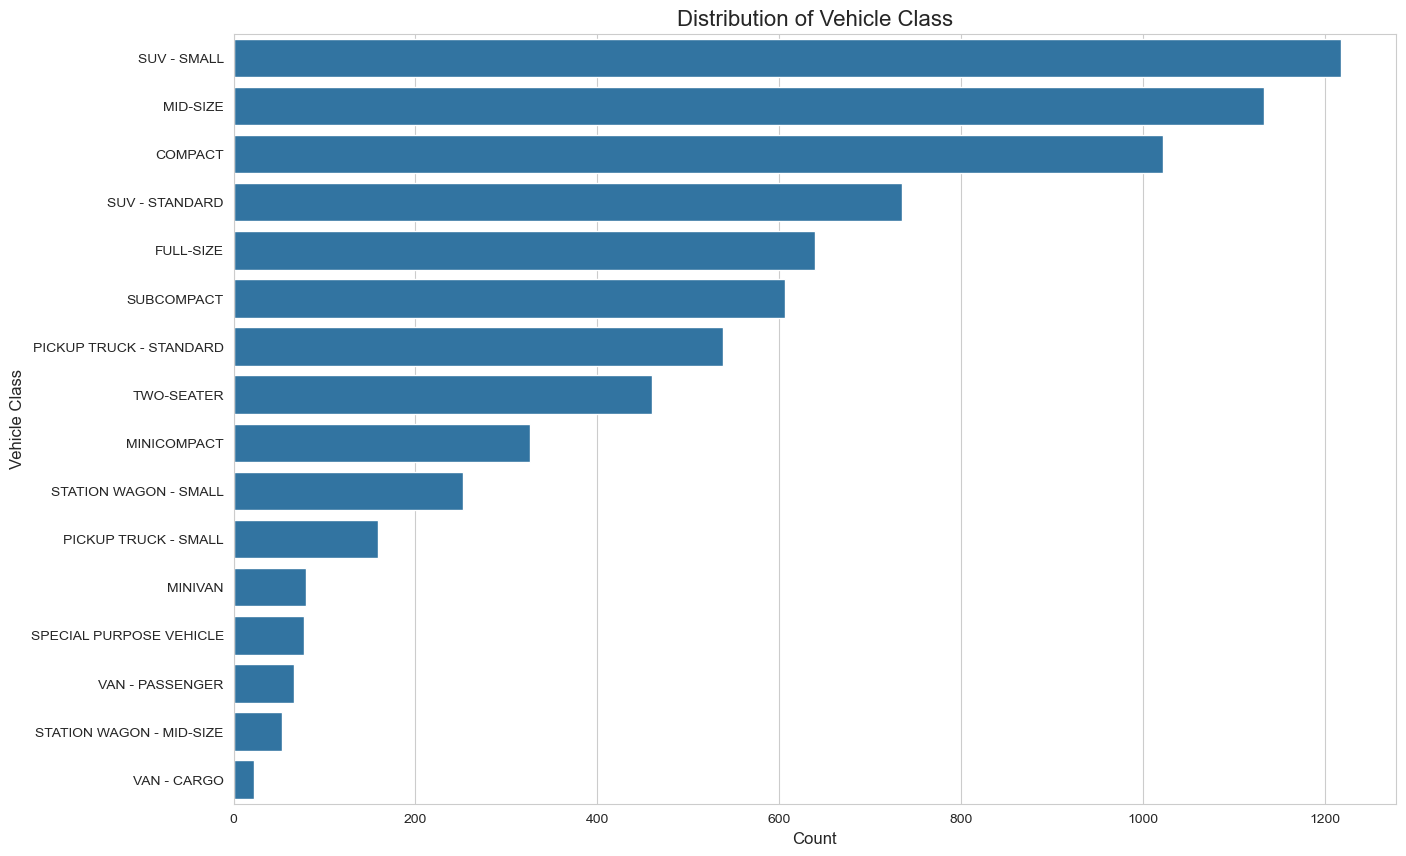

In [37]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Vehicle Class', data=data, order=data['Vehicle Class'].value_counts().index)
plt.title('Distribution of Vehicle Class', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Vehicle Class', fontsize=12)
plt.show()

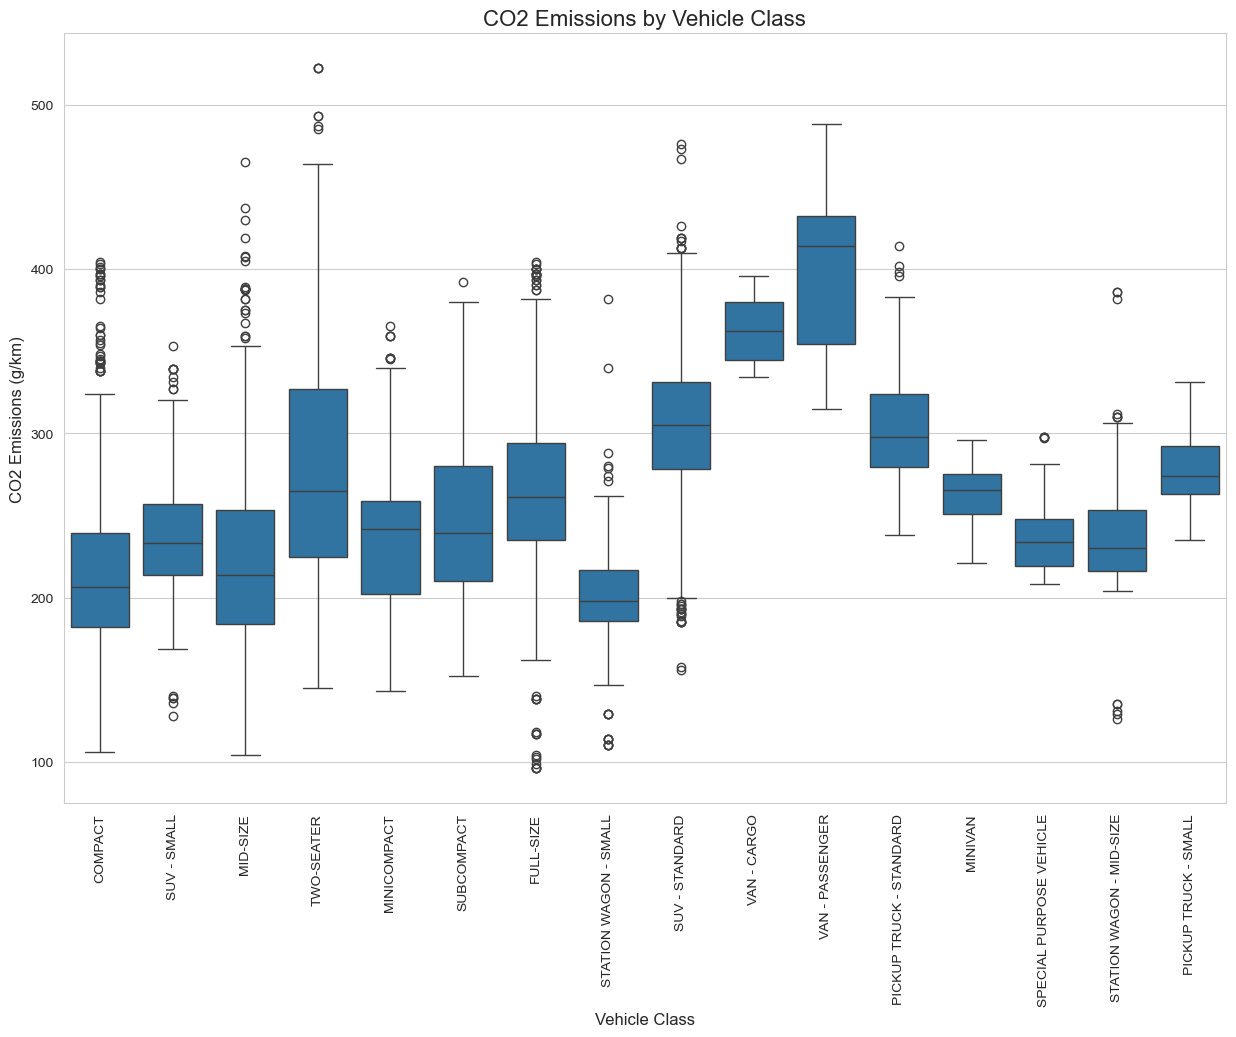

In [38]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Vehicle Class', fontsize=16)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.show()

<font color = orange> **3. Transmission**

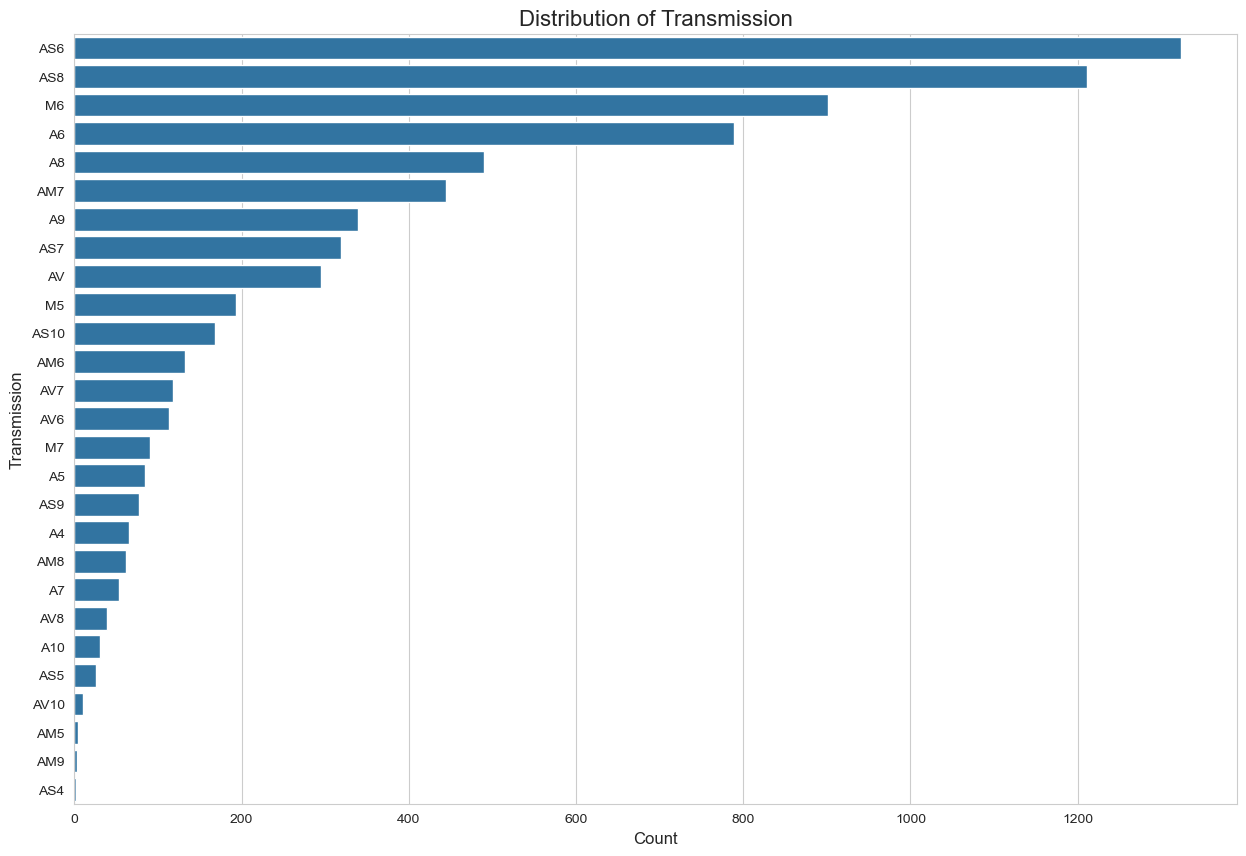

In [39]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Transmission', data=data, order=data['Transmission'].value_counts().index)
plt.title('Distribution of Transmission', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Transmission', fontsize=12)
plt.show()

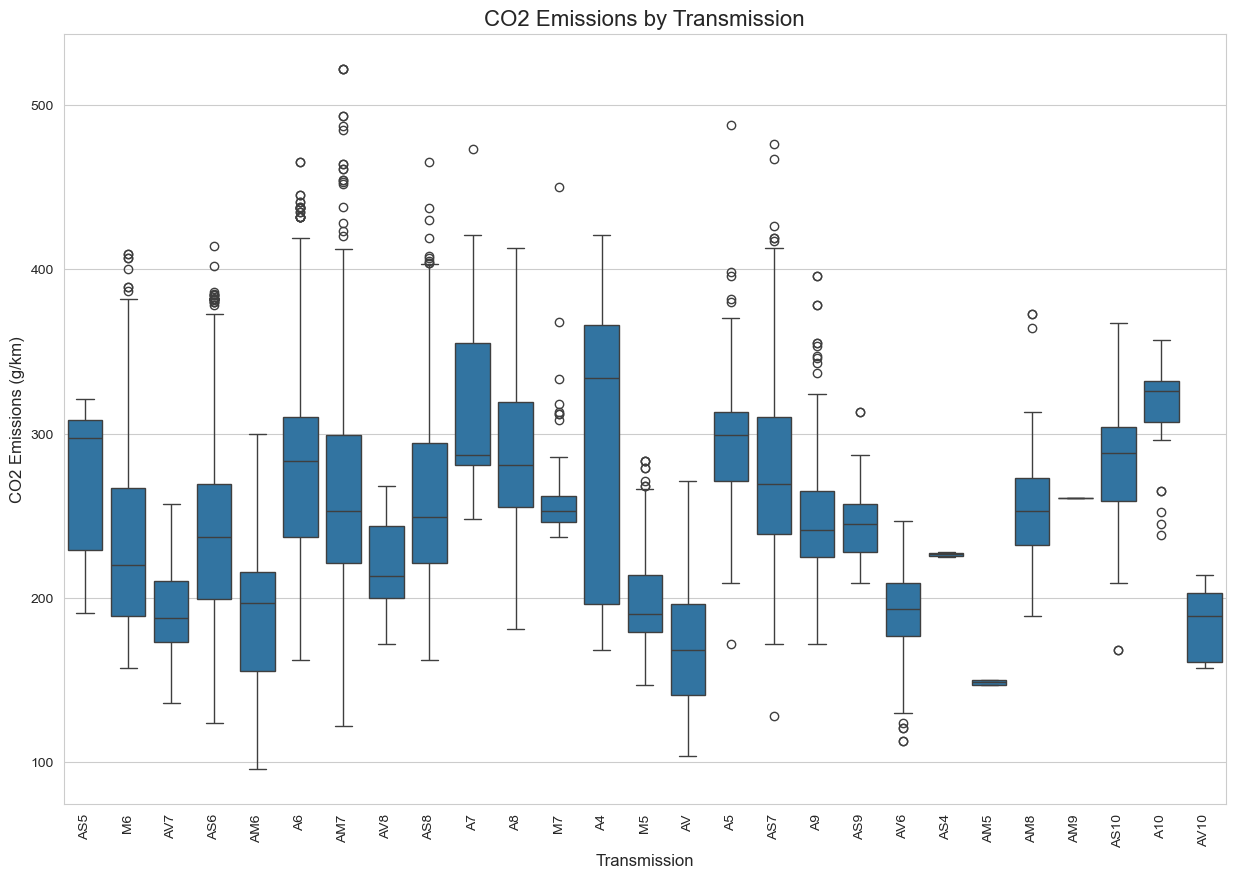

In [40]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=data)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Transmission', fontsize=16)
plt.xlabel('Transmission', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.show()

<font color = orange> **4. Fuel Type**

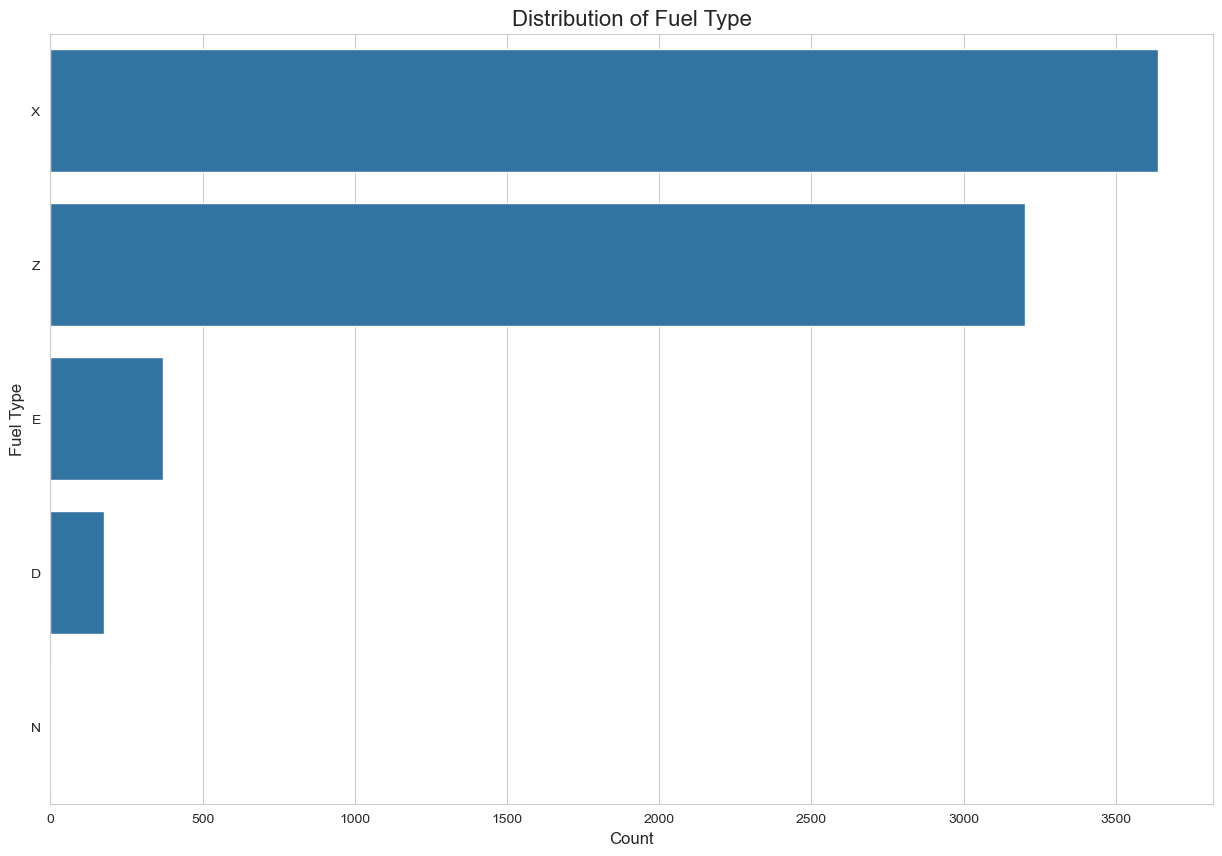

In [41]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Fuel Type', data=data, order=data['Fuel Type'].value_counts().index)
plt.title('Distribution of Fuel Type', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Fuel Type', fontsize=12)
plt.show()

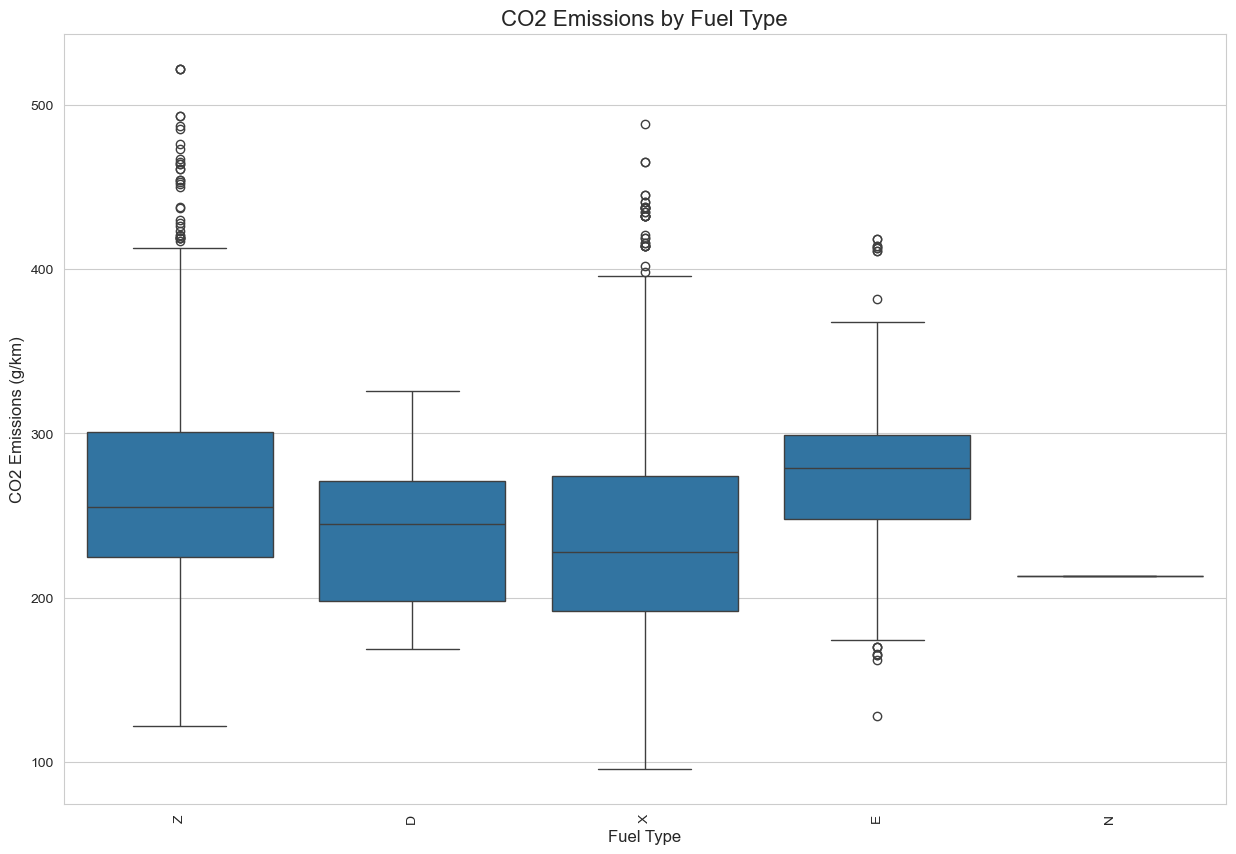

In [42]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=data)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.show()

## Model Building

### Preprocess the data before modeling.

- Split the data into training and test sets.

- Use Pipeline to build preprocessors to preprocess different features.
    - **Numeric features:** Replace missing values with the median and then Standardize the data.
      
    - **Categorical features:** Replace missing values with the most frequency, and then one-hot encode the data.

In [33]:
X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                    'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                    'Fuel Consumption Comb (mpg)']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_features = ['Brand', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Linear Regression

In [34]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 29.99
R^2 Score: 0.99
Root Mean Squared Error: 5.48


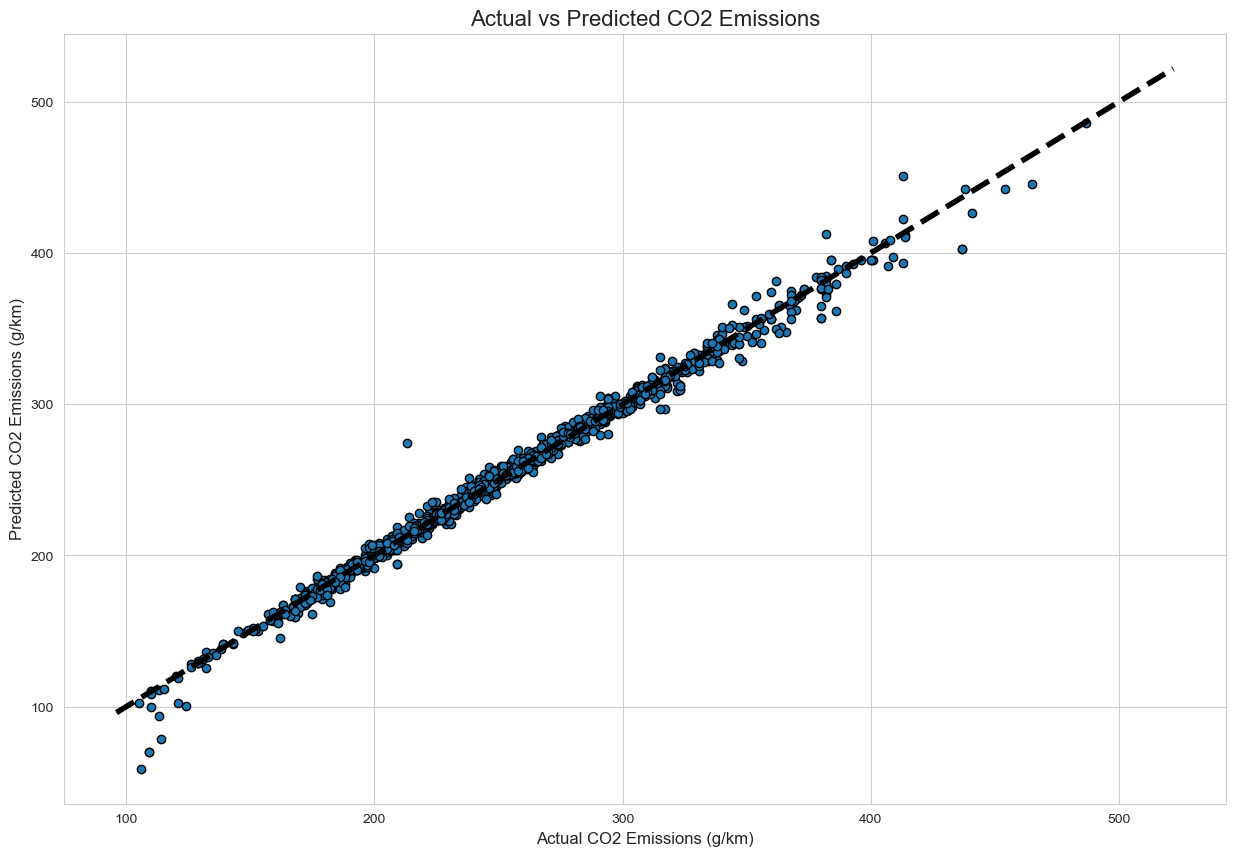

In [43]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Predicted CO2 Emissions (g/km)', fontsize=12)
plt.title('Actual vs Predicted CO2 Emissions', fontsize=16)
plt.show()

Residuals

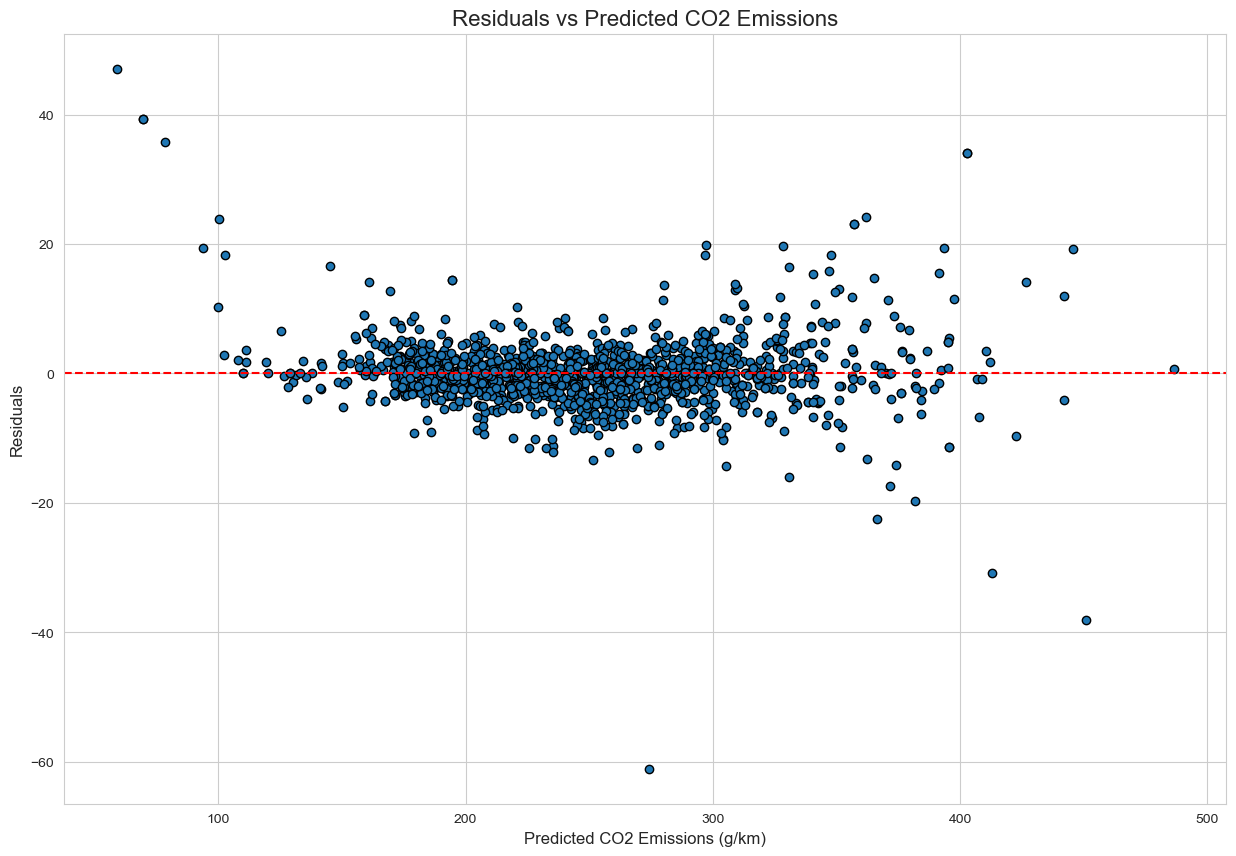

In [44]:
residuals = y_test - y_pred
plt.figure(figsize=(15, 10))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted CO2 Emissions', fontsize=16)
plt.show()